In [ ]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
import pandas as pd
import spacy
from transformers import pipeline
from spacy.matcher import PhraseMatcher

df = pd.read_csv('/content/climate_change_reports.csv')

print(df.head())

nlp = spacy.load('en_core_web_md')  

matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

phrases = ["carbon emissions", "renewable energy", "biodiversity", "wildlife protection", "climate action", "fossil fuel"]
patterns = [nlp(text) for text in phrases]
matcher.add("CUSTOM_ENTITIES", patterns)

def extract_entities_with_custom(text):
    doc = nlp(text)

    entities = [(ent.text, ent.label_) for ent in doc.ents]

    matches = matcher(doc)
    custom_entities = [(doc[start:end].text, "CUSTOM") for match_id, start, end in matches]

    return entities + custom_entities

summarizer = pipeline('summarization', model='facebook/bart-large-cnn')

def summarize_text(text):
    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)
    return summary[0]['summary_text']

def ner_and_summarize(text):
    entities = extract_entities_with_custom(text)
    summary = summarize_text(text)

    return {
        "entities": entities,
        "summary": summary
    }

results = []

for content in df['Report'][:5]:  
    result = ner_and_summarize(content)
    results.append(result)

for idx, res in enumerate(results):
    print(f"Report {idx + 1}:")
    print("Entities:", res['entities'])
    print("Summary:", res['summary'])
    print("=" * 80)



   Country  Year            Key Indicator  \
0  Germany  2012  fossil fuel consumption   
1   France  2000           water scarcity   
2   Russia  2020  climate action policies   
3   Mexico  2004        biodiversity loss   
4  Germany  2013   renewable energy usage   

                                              Report  
0  In 2012, Germany faced significant challenges ...  
1  In 2000, France faced significant challenges r...  
2  In 2020, Russia faced significant challenges r...  
3  In 2004, Mexico faced significant challenges r...  
4  In 2013, Germany faced significant challenges ...  


Device set to use cpu
Your max_length is set to 150, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 150, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 150, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 150, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...

Report 1:
Entities: [('2012', 'DATE'), ('Germany', 'GPE'), ('fossil fuel', 'CUSTOM')]
Summary: In 2012, Germany faced significant challenges related to fossil fuel consumption. New government initiatives to reduce carbon footprints and promote sustainable urban development are underway. Germany is one of the world's leading carbon emitters, according to a report by the World Resources Institute.
Report 2:
Entities: [('2000', 'DATE'), ('France', 'GPE'), ('carbon emissions', 'CUSTOM'), ('renewable energy', 'CUSTOM')]
Summary: In 2000, France faced significant challenges related to water scarcity. The country's approach to reducing carbon emissions through increased reliance on renewable energy sources. In 2000, the country faced significant problems related toWater scarcity. Today, France's approach is to reduce carbon emissions by increasing reliance on renewables.
Report 3:
Entities: [('2020', 'DATE'), ('Russia', 'GPE'), ('climate action', 'CUSTOM'), ('renewable energy', 'CUSTOM'), ('f

In [3]:
import pandas as pd
import spacy
from transformers import pipeline
from spacy.matcher import PhraseMatcher

df = pd.read_csv('/content/large_climate_change_dataset (1).csv')
print(df.head())


nlp = spacy.load('en_core_web_md')

matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

phrases = ["carbon emissions", "renewable energy", "biodiversity", "wildlife protection", "climate action", "fossil fuel"]
patterns = [nlp(text) for text in phrases]
matcher.add("CUSTOM_ENTITIES", patterns)

def extract_entities_with_custom(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    matches = matcher(doc)
    custom_entities = [(doc[start:end].text, "CUSTOM") for match_id, start, end in matches]

    return entities + custom_entities

summarizer = pipeline('summarization', model='facebook/bart-large-cnn')

def summarize_text(text):
    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)
    return summary[0]['summary_text']

def ner_and_summarize(text):

    entities = extract_entities_with_custom(text)

    summary = summarize_text(text)

    return {
        "entities": entities,
        "summary": summary
    }
results = []

for description in df['Key_Indicator'][:5]:
    result = ner_and_summarize(description)
    results.append(result)

for idx, res in enumerate(results):
    print(f"Entry {idx + 1}:")
    print("Entities:", res['entities'])
    print("Summary:", res['summary'])
    print("=" * 80)


    Country  Year      Key_Indicator          Sector  Emissions_MT_CO2  \
0  CountryG  2000      CO2 Emissions          Marine        980.696940   
1  CountryD  2014   Greenhouse Gases     Residential        877.441955   
2  CountryH  2007     Water Scarcity  Transportation        873.734143   
3  CountryE  2010  Air Quality Index     Residential       1011.360652   
4  CountryG  2011      CO2 Emissions          Energy        845.153952   

   Population_Millions  GDP_USD_Billions          Climate_Policy   Latitude  \
0           107.331363        325.709012  Coastal Protection Law  33.722659   
1           133.515213       4661.037967       Reforestation Act  10.498462   
2           239.371841       3337.912795         Paris Agreement  14.238308   
3            87.048101       3757.178133         Air Quality Act  50.381293   
4            46.965296       1626.701524        Renewable Target  48.573667   

    Longitude      Event  Source_Credibility  
0  -97.476883   Heatwave         

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 150, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)
Your max_length is set to 150, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_

Entry 1:
Entities: []
Summary: CNN.com will feature iReporter photos in a weekly Travel Snapshots gallery. Visit CNN.com/Travel each week for a new gallery of snapshots. Visit www.dailymail.co.uk/travel each week to see which destinations will feature in the next Travel Snapshot gallery.
Entry 2:
Entities: [('Greenhouse Gases', 'PERSON')]
Summary: Greenhouse Gases is a type of greenhouse gas. It is used to produce CO2, CO3, and other greenhouse gases. It can also be used to create CO2-like emissions in the atmosphere. Greenhouses Gases can be found on the Greenhouse Gase website.
Entry 3:
Entities: []
Summary: Water Scarcity is a problem in many parts of the U.S. Water is the main source of water for many people. Water shortages have been reported in parts of California, New York and Texas. Water scarcity is a major problem in some areas of the country.
Entry 4:
Entities: [('Air Quality', 'ORG')]
Summary: Air Quality Index is a measure of the quality of the air in an area. The index is

In [4]:
pip install matplotlib seaborn


    Country  Year      Key_Indicator          Sector  Emissions_MT_CO2  \
0  CountryG  2000      CO2 Emissions          Marine        980.696940   
1  CountryD  2014   Greenhouse Gases     Residential        877.441955   
2  CountryH  2007     Water Scarcity  Transportation        873.734143   
3  CountryE  2010  Air Quality Index     Residential       1011.360652   
4  CountryG  2011      CO2 Emissions          Energy        845.153952   

   Population_Millions  GDP_USD_Billions          Climate_Policy   Latitude  \
0           107.331363        325.709012  Coastal Protection Law  33.722659   
1           133.515213       4661.037967       Reforestation Act  10.498462   
2           239.371841       3337.912795         Paris Agreement  14.238308   
3            87.048101       3757.178133         Air Quality Act  50.381293   
4            46.965296       1626.701524        Renewable Target  48.573667   

    Longitude      Event  Source_Credibility  
0  -97.476883   Heatwave         

<ipython-input-5-b8671bbcca64>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Emissions_MT_CO2", hue="Sector", estimator="mean", ci=None)


<Figure size 1200x800 with 0 Axes>

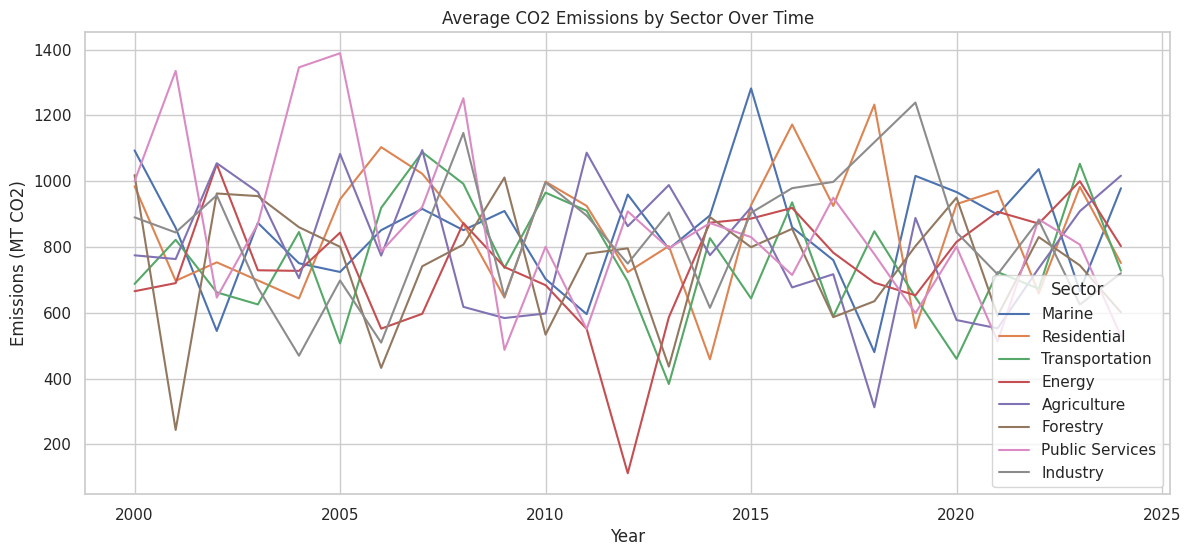

<ipython-input-5-b8671bbcca64>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Country", y="Population_Millions", palette="viridis")


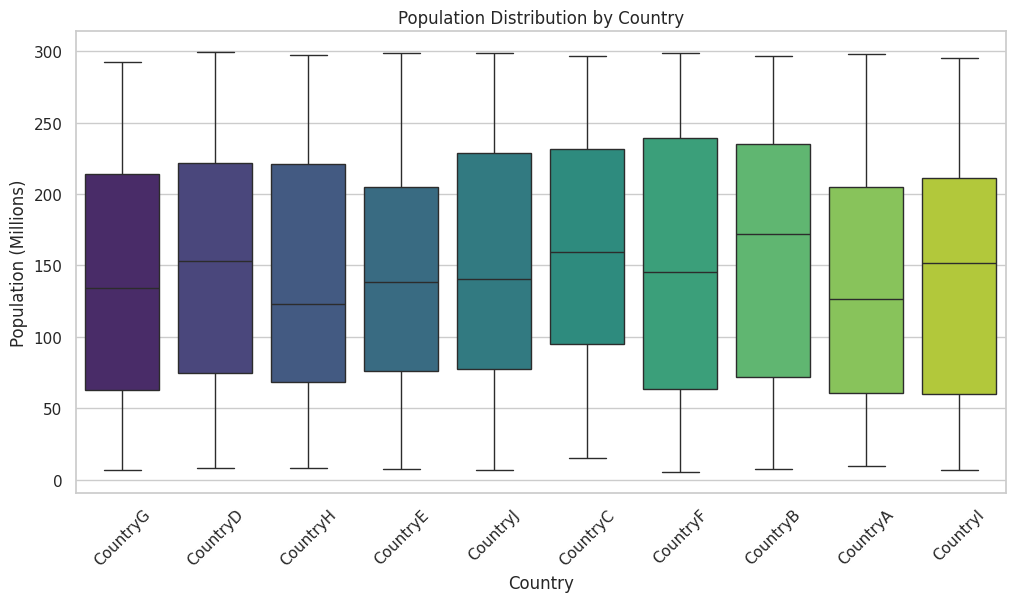

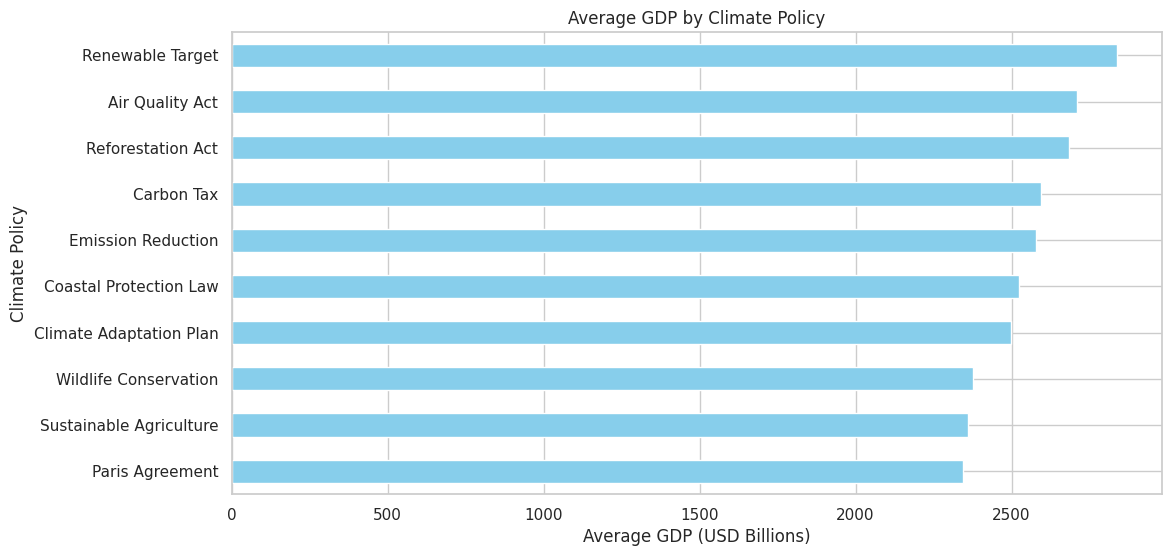

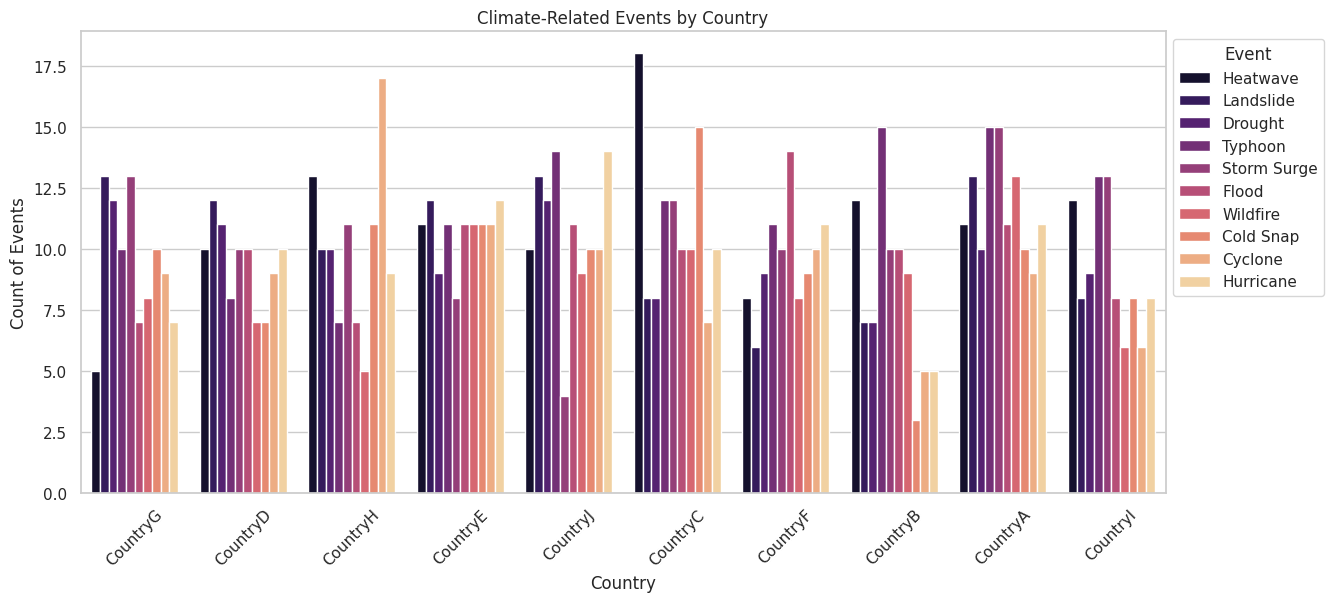

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/large_climate_change_dataset (1).csv')

# Display the first few rows to check the dataset structure
print(df.head())

# Setting a larger figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 1. Visualize emissions trends over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Year", y="Emissions_MT_CO2", hue="Sector", estimator="mean", ci=None)
plt.title("Average CO2 Emissions by Sector Over Time")
plt.ylabel("Emissions (MT CO2)")
plt.xlabel("Year")
plt.legend(title="Sector")
plt.show()

# 2. Show population distribution by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Country", y="Population_Millions", palette="viridis")
plt.title("Population Distribution by Country")
plt.ylabel("Population (Millions)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# 3. Average GDP by policy type
policy_gdp = df.groupby("Climate_Policy")["GDP_USD_Billions"].mean().sort_values()
plt.figure(figsize=(12, 6))
policy_gdp.plot(kind="barh", color="skyblue")
plt.title("Average GDP by Climate Policy")
plt.xlabel("Average GDP (USD Billions)")
plt.ylabel("Climate Policy")
plt.show()

# 4. Count of events by country as a bar plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x="Country", hue="Event", palette="magma")
plt.title("Climate-Related Events by Country")
plt.xlabel("Country")
plt.ylabel("Count of Events")
plt.xticks(rotation=45)
plt.legend(title="Event", bbox_to_anchor=(1, 1))
plt.show()



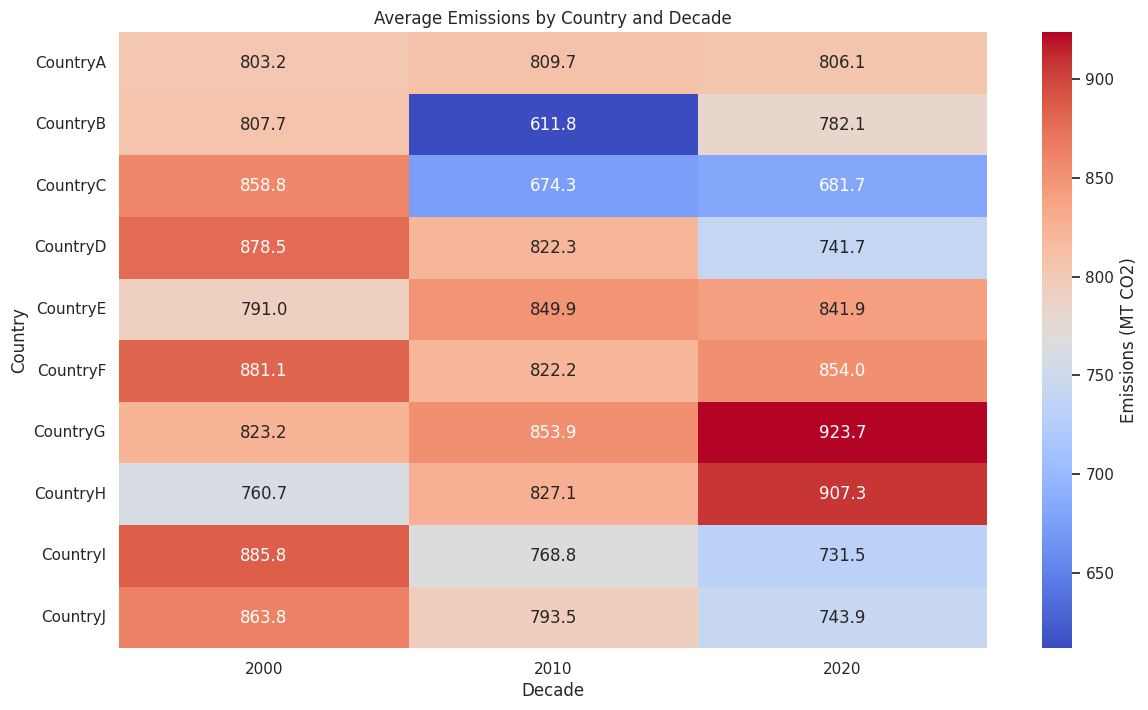

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/large_climate_change_dataset (1).csv')

# Aggregate emissions by decade for readability
df['Decade'] = (df['Year'] // 10) * 10
emissions_pivot = df.groupby(['Country', 'Decade'])['Emissions_MT_CO2'].mean().unstack()

# Plotting the improved heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(emissions_pivot, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Emissions (MT CO2)'})
plt.title("Average Emissions by Country and Decade")
plt.xlabel("Decade")
plt.ylabel("Country")
plt.show()
